## 1. Importing Libraries and Data


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [3]:
%matplotlib inline

In [4]:
#Import data
df = pd.read_csv(r'C:\Users\kater\Desktop\DATA IMMERSION\ACHIEVEMENT 6\archive\All data sets.csv', index_col= False)

In [5]:
#Create path
path = r'C:\Users\kater\Desktop'

## 2. Data Cleaning

In [6]:
df.shape

(782, 10)

In [7]:
df.head()

,Year,Country,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity
0,2015,Switzerland,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,Iceland,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,Denmark,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,Norway,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,Canada,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [8]:
# Create subset without "Country" column
columns = ["Year", "Happiness Rank", "Happiness Score", "GDP per Capita", "Family", "Life Expectancy", "Freedom",
"Perceptions of Goverment Corruption", "Generosity"]

In [9]:
#Create a subset
df_2 = df[columns]

In [10]:
df_2.head()

,Year,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


#### Missing values

In [11]:
#Check for missing values
df_2.isnull().sum()

Year                                   0
Happiness Rank                         0
Happiness Score                        0
GDP per Capita                         0
Family                                 0
Life Expectancy                        0
Freedom                                0
Perceptions of Goverment Corruption    1
Generosity                             0
dtype: int64

In [12]:
#Impute missing value with median
df_2['Perceptions of Goverment Corruption'].fillna(df_2['Perceptions of Goverment Corruption'].median(), inplace=True)

C:\Users\kater\AppData\Local\Temp\ipykernel_23264\1681524365.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Perceptions of Goverment Corruption'].fillna(df_2['Perceptions of Goverment Corruption'].median(), inplace=True)


In [13]:
#Last check for NaN
df_2.isnull().sum()

Year                                   0
Happiness Rank                         0
Happiness Score                        0
GDP per Capita                         0
Family                                 0
Life Expectancy                        0
Freedom                                0
Perceptions of Goverment Corruption    0
Generosity                             0
dtype: int64

### Duplicate check

In [14]:
dups = df_2.duplicated()

In [15]:
dups.shape

(782,)

No duplicates were found

## 3. The Elbow Technique

In [16]:
#Define the range of potential clusters in the data and k-means clusters
num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [17]:
#Create a score 
score = [kmeans[i].fit(df_2).score(df_2) for i in range(len(kmeans))] 

score

C:\Users\kater\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kater\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kater\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kater\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-1597233.755071517,
 -400711.32817519875,
 -179157.2152795301,
 -101544.65342315534,
 -65634.55720161155,
 -46315.50860144713,
 -34385.971742747584,
 -26773.442406609996,
 -21492.950937871537]

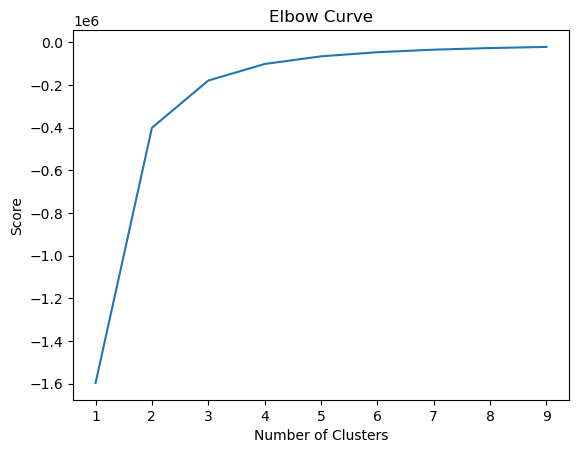

In [18]:
#Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow, or the breaking point of the curve, jumps rapidly from two to three on the x-axis, then rises only slightly after three. That means that the optimal count for your clusters is three.

## 4. k-means clustering

In [19]:
#Create the k-means object.
kmeans = KMeans(n_clusters = 3) 

In [20]:
#Fit the k-means object to the data.
kmeans.fit(df_2)

C:\Users\kater\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [21]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\kater\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [22]:
df_2.head()

,Year,Happiness Rank,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Perceptions of Goverment Corruption,Generosity,clusters
0,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,0
1,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,0
2,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,0
3,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,0
4,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,0


In [23]:
#Check how many observations fall into each cluster
df_2['clusters'].value_counts()

clusters
1    262
0    260
2    260
Name: count, dtype: int64

## 5. Visualizations

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


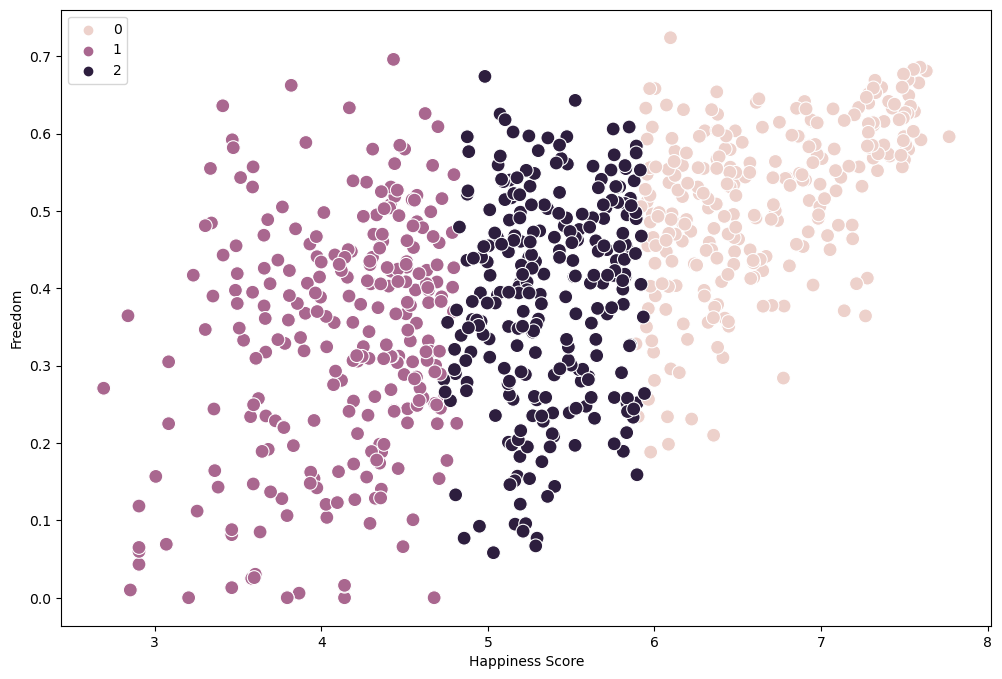

In [24]:
#Plot the clusters for the "Happiness Score" and "Freedom" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Happiness Score'], y=df_2['Freedom'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Happiness Score') 
plt.ylabel('Freedom') 
plt.show()

The dark purple cluster (coded as "2" in legend) is the most populated. It gathers the data points with lower happiness score and different levels of freedom. The second cluster, in light purple (coded as “1” in the legend), includes points with greater level of freedom and happiness score. The third cluster, in light pink (coded as “0” in the legend), contains the points with the highest level of freedom and highest happiness score.

C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kater\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


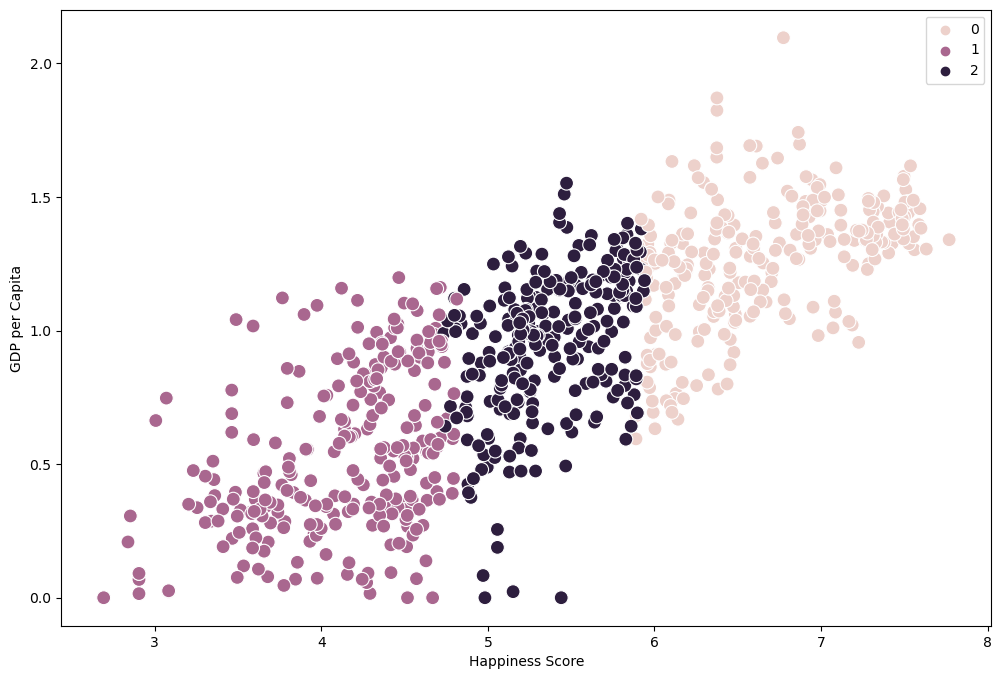

In [25]:
#Plot the clusters for the "Happiness Score" and "GDP per Capita" variables.
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['Happiness Score'], y=df_2['GDP per Capita'], hue=kmeans.labels_, s=100) 


ax.grid(False) 
plt.xlabel('Happiness Score') 
plt.ylabel('GDP per Capita') 
plt.show()

The dark purple cluster (coded as "2" in legend) is the most populated. It gathers the data points with lower happiness score and low and medium levels of GDP per Capita. The second cluster, in light purple (coded as “1” in the legend), includes points with greater GDP per Capita and happiness score, with the exception of few very low ones. The third cluster, in light pink (coded as “0” in the legend), contains the points with the highest level of GDP per Capita and highest happiness score.

## 6. Descriptive statistics

In [26]:
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'light purple'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'light pink'

C:\Users\kater\AppData\Local\Temp\ipykernel_23264\3560076725.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'dark purple' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'dark purple'


In [27]:
df_2.groupby('cluster').agg({'Happiness Score':['mean', 'median'], 
                         'GDP per Capita':['mean', 'median'],
                          'Family':['mean', 'median'],
                            'Life Expectancy':['mean', 'median'],
                             'Freedom':['mean', 'median'],
                            'Perceptions of Goverment Corruption':['mean', 'median'],
                            'Generosity':['mean', 'median']})
                        

Happiness Score         GDP per Capita              Family  \
                        mean  median           mean    median      mean   
cluster                                                                   
dark purple         5.374785  5.3235       0.957150  0.996375  1.120393   
light pink          6.652004  6.5585       1.265592  1.307820  1.299199   
light purple        4.119950  4.2405       0.528382  0.471775  0.817591   

                       Life Expectancy             Freedom            \
                median            mean    median      mean    median   
cluster                                                                
dark purple   1.160919        0.653778  0.661730  0.387908  0.406665   
light pink    1.323055        0.803007  0.816044  0.514785  0.536373   
light purple  0.853755        0.382232  0.359870  0.331195  0.351794   

             Perceptions of Goverment Corruption           Generosity           
                                            mean    median       mean   median  
cluster                                                                         
dark purple                             0.089163  0.073173   0.189006  0.18000  
light pink                              0.184915  0.145340   0.247247  0.24200  
light purple                            0.102275  0.085910   0.219468  0.20245

The light pink cluster has the best stats in almost all categories. Higher the levels of freedom, life expectancy and DGP per Capita, higher the happiness score.

This descriptive statistics could be used further to determain which factor influences the happiness score the most around the world.


In [28]:
df_2.to_csv(os.path.join(path, 'DATA IMMERSION', 'ACHIEVEMENT 6', 'archive','cluster.csv'))